## 각 변수의 의미
date : 날짜  
Rented Bike Count : 대여수  
Hour : 시간  
Temperature(°C) : 온도  
Humidity(%) : 습도  
Wind speed (m/s) : 풍속  
Visibility (10m) : 가시성  
Dew point temperature(°C) : 이슬점온도  
Solar Radiation (MJ/m2) : 태양복사  
Rainfall(mm) : 강우량  
Snowfall (cm) : 강설량  
Seasons : 계절  
Holiday	: 휴일  
Functioning Day : 해당 날짜와 시간에 자전거 대여가능 여부

가설 1 : 겨울 > 여름 > 봄,가을 순으로 자전거 대여량이 많을 것이다.  
가설 2 : 출퇴근 시간에 자전거 대여량이 많을 것이다.  

In [3]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import random


# numerical calculation & data frames
import numpy as np
import pandas as pd

#데이터 변수별로 정리하기 전에 전체 데이터 살펴보기

#데이터 형태 살펴보기
df=pd.read_csv("C:/Users/정가경/Downloads/train (2).csv",encoding='EUC-KR')
df.head(100)

#현재 데이터를 날짜순서대로 정렬시키기

#date 열을 date type으로 변경 시키는 방법
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

#date 기준으로 데이터프레임 정렬
df= df.sort_values(by=['Date','Hour'])

#date 기준으로 정렬하여 인덱스가 섞여서 인덱스열 리셋해주기
df=df.reset_index()
#df=df.set_index(['Rented Bike Count','Hour'])
df.drop('index',axis=1,inplace=True)


#특정 변수 중에 모든 값이 na인 변수 삭제하기-> 모든 값이 na라면 분석 시 신경쓰지 않아도 된다고 생각함 
df.dropna(axis=1,how='all')
df[df['Date']=='2018-06-01']


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3477,2018-06-01,963,0,NaN,63,NaN,1698,12.8,0.00,0.0,0.0,Summer,No Holiday,Yes
3478,2018-06-01,554,2,19.0,72,1.4,1258,13.8,0.00,0.0,0.0,NaN,No Holiday,Yes
3479,2018-06-01,265,4,18.1,76,1.8,561,13.7,0.00,0.0,0.0,NaN,No Holiday,Yes
3480,2018-06-01,306,5,17.8,75,1.0,1210,13.3,0.00,0.0,0.0,Summer,No Holiday,Yes
3481,2018-06-01,672,6,17.5,76,1.2,1161,13.2,0.05,0.0,0.0,Summer,No Holiday,Yes
3482,2018-06-01,1421,7,18.1,64,0.6,923,11.1,0.47,0.0,0.0,Summer,No Holiday,Yes
3483,2018-06-01,2149,8,20.6,55,0.7,1200,11.2,1.21,0.0,0.0,Summer,No Holiday,Yes
3484,2018-06-01,862,10,NaN,45,1.3,1371,12.5,2.45,0.0,0.0,Summer,No Holiday,Yes
3485,2018-06-01,1036,11,26.8,38,2.6,1879,11.2,2.99,0.0,0.0,NaN,No Holiday,Yes
3486,2018-06-01,1076,12,28.2,34,2.6,1867,10.8,3.26,0.0,0.0,Summer,No Holiday,Yes


In [4]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,2018-06-01 04:16:38.630137088,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-01 00:00:00,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,2018-06-02 00:00:00,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-09-01 00:00:00,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936


In [5]:
#결측치 존재하는 변수 확인
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      699
Holiday                        0
Functioning Day                0
dtype: int64

# 결측값 해결하기

In [6]:
# seasons 결측값 처리
# 12,1,2 -> 겨울 , 3,4,5 -> 봄 , 6,7,8 -> 여름 , 9,10,11 -> 가을

df.loc[df['Date'].dt.month.isin([12, 1, 2]), 'Seasons'] = 'Winter'
df.loc[df['Date'].dt.month.isin([3, 4, 5]), 'Seasons'] = 'Spring'
df.loc[df['Date'].dt.month.isin([6, 7, 8]), 'Seasons'] = 'Summer'
df.loc[df['Date'].dt.month.isin([9, 10,11]), 'Seasons'] = 'Autumn'

df['Seasons'].isna().sum()

0

In [7]:
#내가 미리 조사한 기상청 데이터로 나눈 기온집단에서 벗어나지 않는 계절별 평균기온을 확인할 수 있고 결측값은 계절별 평균기온으로 대체하기로 결정한다.

season_means = df.groupby('Seasons')['Temperature(°C)'].transform(lambda x: round(x.mean(),2))
print(season_means)
df['Temperature(°C)'] = df['Temperature(°C)'].fillna(season_means)
df.head(10)

0       -2.51
1       -2.51
2       -2.51
3       -2.51
4       -2.51
        ...  
7003    14.16
7004    14.16
7005    14.16
7006    14.16
7007    14.16
Name: Temperature(°C), Length: 7008, dtype: float64


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.20,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.50,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.00,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.20,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.00,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01,100,5,-6.40,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,2017-12-01,181,6,-2.51,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,2017-12-01,460,7,-7.40,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,2017-12-01,930,8,-2.51,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,2017-12-01,490,9,-6.50,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#선형보간법을 통해서 결측치를 채우기
#데이터를 날짜별로 정렬해두었기 때문에 결측치가 포함된 행은 해당 행의 앞뒤 행과 관련이 있을 것이라고 판단
df['Wind speed (m/s)'] = round(df['Wind speed (m/s)'].interpolate(method='linear'),2)
print(df['Wind speed (m/s)'].isna().sum(),'\n')
print(sorted(df['Wind speed (m/s)'].unique().tolist()))

0 

[0.0, 0.05, 0.07, 0.1, 0.13, 0.15, 0.2, 0.25, 0.27, 0.3, 0.35, 0.37, 0.4, 0.43, 0.45, 0.47, 0.5, 0.53, 0.55, 0.6, 0.63, 0.65, 0.67, 0.7, 0.73, 0.75, 0.77, 0.8, 0.83, 0.85, 0.87, 0.9, 0.93, 0.95, 0.97, 1.0, 1.03, 1.05, 1.07, 1.1, 1.13, 1.15, 1.17, 1.2, 1.23, 1.25, 1.27, 1.3, 1.33, 1.35, 1.37, 1.4, 1.43, 1.45, 1.47, 1.5, 1.53, 1.55, 1.57, 1.6, 1.63, 1.65, 1.67, 1.7, 1.73, 1.75, 1.8, 1.83, 1.85, 1.87, 1.9, 1.93, 1.95, 1.97, 2.0, 2.03, 2.05, 2.1, 2.12, 2.15, 2.2, 2.23, 2.25, 2.27, 2.3, 2.33, 2.35, 2.4, 2.43, 2.45, 2.47, 2.5, 2.55, 2.58, 2.6, 2.65, 2.7, 2.75, 2.77, 2.78, 2.8, 2.85, 2.9, 2.95, 3.0, 3.03, 3.05, 3.08, 3.1, 3.12, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.57, 3.6, 3.63, 3.7, 3.75, 3.8, 3.9, 3.97, 4.0, 4.1, 4.13, 4.2, 4.25, 4.27, 4.3, 4.4, 4.5, 4.55, 4.6, 4.65, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.55, 5.6, 5.7, 5.8, 6.0, 6.1, 6.9, 7.2, 7.27, 7.3, 7.33, 7.4]


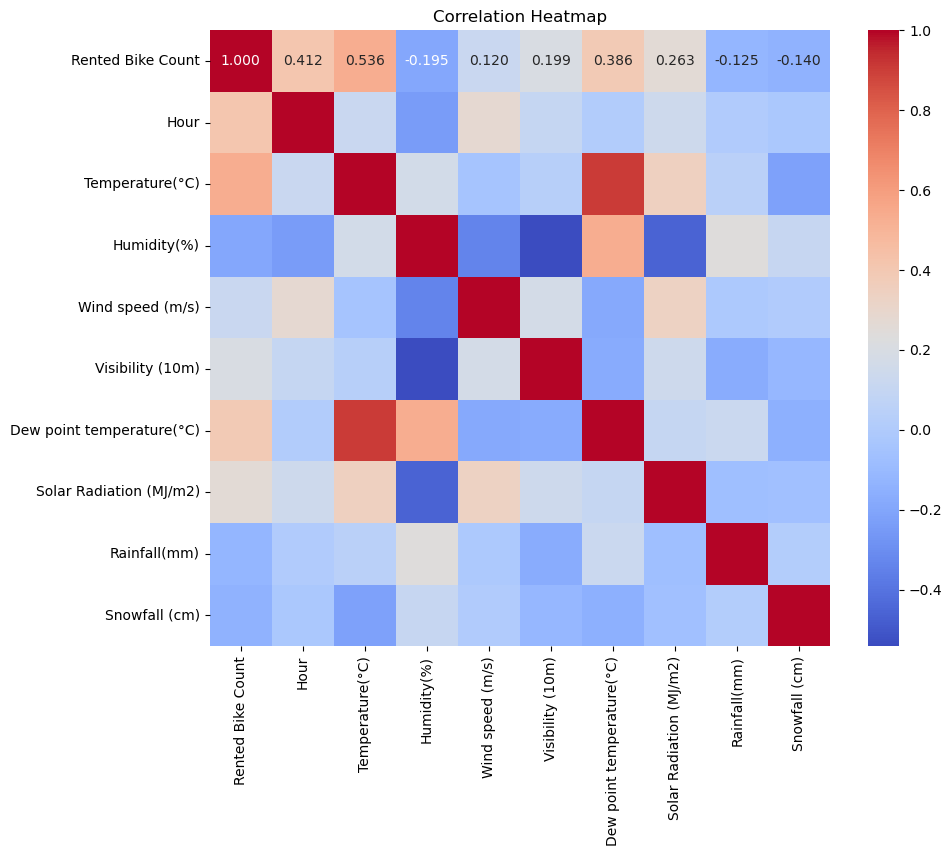

In [9]:
#전체 변수들간의 관계를 보기 위해서 상관계수 heatmap그리기
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_corr=df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Monthly Total Rented Bike Count')

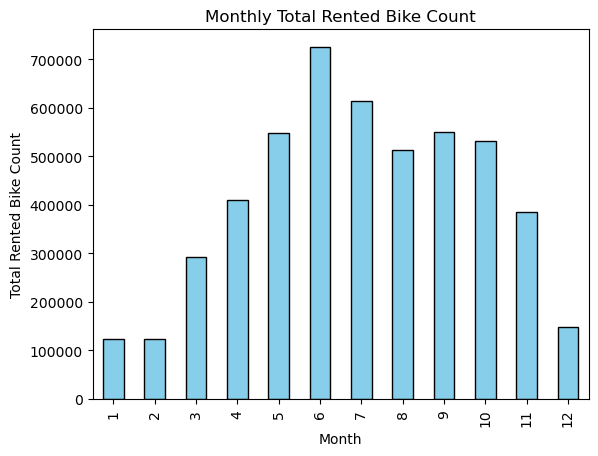

In [10]:
#Date 
#달 별 자전거 대여수 파악하기
monthly_data = df.groupby(df['Date'].dt.month)['Rented Bike Count'].sum()
monthly_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')
plt.title('Monthly Total Rented Bike Count')
# 6월과 7월에 유독 높은 대여량을 볼 수 있다.

<Axes: title={'center': 'Rented Bike Count'}, xlabel='[Month]'>

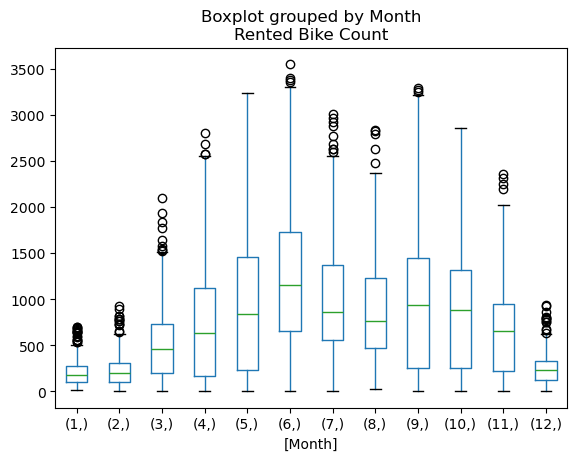

In [11]:
#박스플롯으로 확인하
df['Month']=df['Date'].dt.month
df.boxplot(column='Rented Bike Count',by=['Month'],grid=False)

# Hour
9 to 6라는 말에 맞추어 출근시간을 9시 퇴근시간을 6시로 보고 데이터를 살펴본다.

In [32]:
# 시간 별 평균 대여량 보가
round(df['Rented Bike Count'].groupby(df['Hour']).mean(),2)

# 8시와 17~21시 사이에 높은 대여량을 보이고 있다.

Hour
0      546.28
1      422.65
2      289.43
3      198.03
4      130.55
5      138.77
6      284.11
7      586.73
8     1027.63
9      641.79
10     528.96
11     605.16
12     704.32
13     752.89
14     753.99
15     842.20
16     925.69
17    1149.78
18    1499.16
19    1243.96
20    1097.00
21    1025.36
22     909.37
23     668.45
Name: Rented Bike Count, dtype: float64

Text(0.5, 1.0, 'Total Rented Bike Count')

<Figure size 1000x600 with 0 Axes>

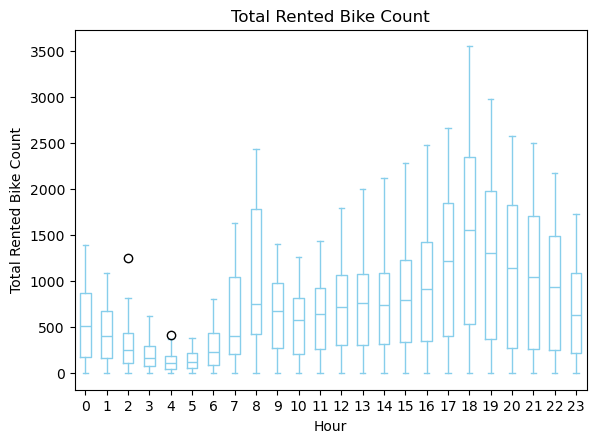

In [29]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Rented Bike Count', by='Hour', grid=False, color='skyblue')
plt.suptitle('') 
plt.xlabel('Hour')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count')

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Total Rented Bike Count')

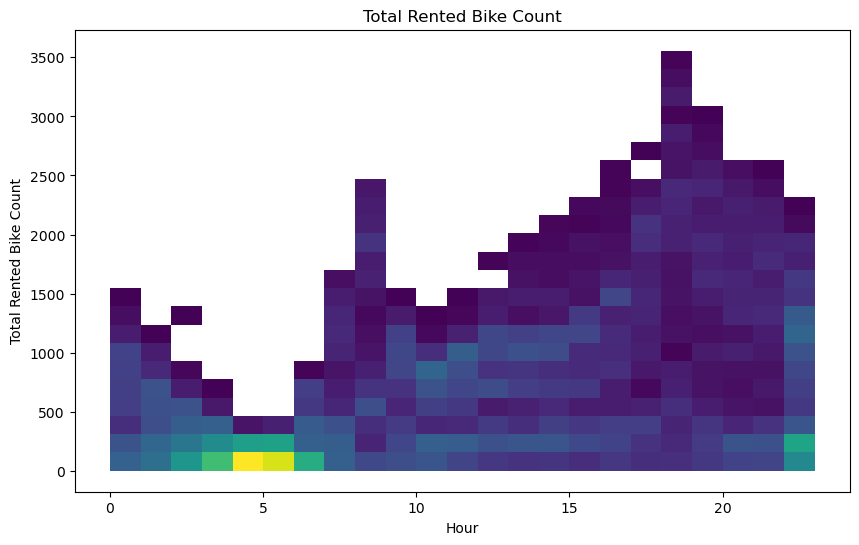

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hour', y='Rented Bike Count', bins=23, cmap='viridis') 
plt.suptitle('') 
plt.xlabel('Hour')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count')

# 히스토그램에서도 눈에 띄는 많은 대여량을 볼 수가 있다.

# Temperature
기상 데이터를 보면 겨울에 해당하는 12,1,2월의 기온은 5도 이하이고 3,4,5월인 봄은 5도 이상 20도 이하이고 여름에 해당하는 6,7,8월은 20도 이상 가을에 해당하는 9,10,11월은 20도 이하 5도이상이라고 볼 수 있다. 이 자료를 기반으로 하여 temperature 변수를 분석해보면  
집단 1 : min(temp)-5  
집단 2 : 5-20  
집단 3 : 20-max(temp)  
날짜들이 어떤 기온집단에 포함되는 지에 따라서 자전거 대여량이 변할 것으로 판단된다.

In [12]:
#Temperature 확인
print(df['Temperature(°C)'].unique().tolist(),'\n')
print(len(df['Temperature(°C)'].unique().tolist()))

[-5.2, -5.5, -6.0, -6.2, -6.4, -2.51, -7.4, -6.5, -3.5, -0.5, 1.7, 2.4, 3.0, 2.1, 1.2, 0.6, 0.0, -0.3, -2.9, -3.8, -4.0, -4.4, -4.2, -0.4, 4.3, 6.0, 7.3, 7.6, 6.4, 5.5, 5.0, 4.1, 3.5, 4.0, 3.9, 3.3, 3.4, 3.1, 3.2, 4.4, 5.1, 6.8, 8.0, 5.7, 5.2, 4.7, 3.6, 2.8, 2.0, 0.2, -0.8, -1.5, 0.1, -0.1, -1.3, -2.1, -4.6, -5.3, -5.8, -6.1, -6.8, -6.9, -1.1, -1.6, -2.6, -3.2, -3.7, -2.8, -2.5, -3.0, -3.4, -3.3, -0.9, 1.6, 1.1, 1.3, 1.4, 1.9, 1.5, 1.0, -0.2, 3.7, 0.7, -1.4, -2.2, -2.7, -4.3, -4.8, -7.0, -6.7, -1.7, -3.1, -4.7, -5.1, -5.4, 2.5, 0.8, 0.3, 0.4, 0.5, 0.9, 4.2, -1.0, -5.6, -5.9, -7.1, -8.6, -9.3, -9.7, -10.2, -10.7, -11.0, -11.2, -11.5, -11.6, -11.8, -12.3, -10.5, -9.4, -8.2, -8.8, -9.5, -11.4, -11.9, -11.7, -8.1, -4.9, -6.6, -8.9, -9.2, -9.8, -10.8, -10.9, -10.4, -7.7, -2.4, -6.3, -7.5, -0.7, -4.5, -5.0, -7.3, -4.1, -7.6, -8.7, -9.0, -9.9, -7.2, 1.8, -3.9, -1.8, -7.8, -8.5, -8.3, -1.9, -2.0, -0.6, 4.5, 5.4, 5.9, 6.5, 4.9, 6.1, 5.8, 5.6, 5.3, 7.0, 7.7, 8.6, 8.2, 6.6, 4.6, 4.8, 2.9, 2.3, 2.

<Axes: xlabel='Seasons', ylabel='Temperature(°C)'>

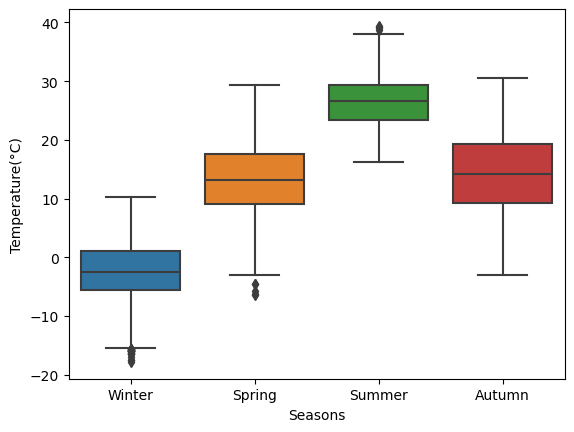

In [14]:
sns.boxplot(x='Seasons',y ='Temperature(°C)', data=df)
#계절별로 뚜렷한 차이를 드러내고 있음

57.2


Text(0.5, 1.0, 'Total Rented Bike Count')

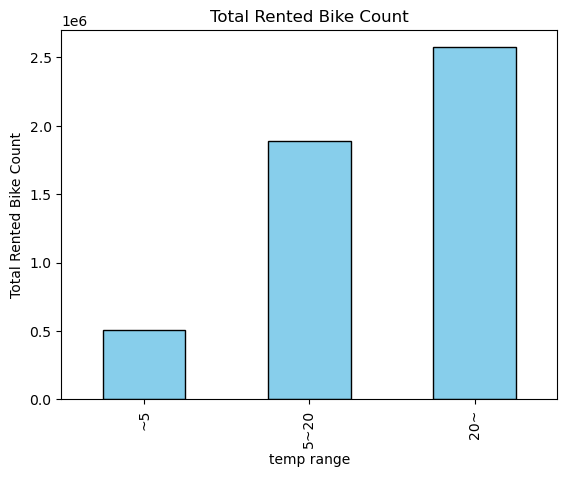

In [15]:
#자전거 대여량을 기온을 특정 범위로 묶어서 보기
#특정 범위는 최솟값에서 최댓값까지 10도 범위로 나눔
print(max(df['Temperature(°C)'])-min(df['Temperature(°C)']))
bins = [min(df['Temperature(°C)']),5,20,max(df['Temperature(°C)'])]
labels = ['~5','5~20','20~']

# Temperature(°C) 열을 범위로 나눔
df['Temp Range'] = pd.cut(df['Temperature(°C)'], bins=bins, labels=labels)

# 범위별로 데이터를 그룹화하고 각 그룹의 Rented Bike Count의 합계 계산
grouped_temp = df.groupby('Temp Range',observed=True)['Rented Bike Count'].sum()

# 결과 출력
grouped_temp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('temp range')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count')

Text(0.5, 1.0, 'Total Rented Bike Count')

<Figure size 1000x600 with 0 Axes>

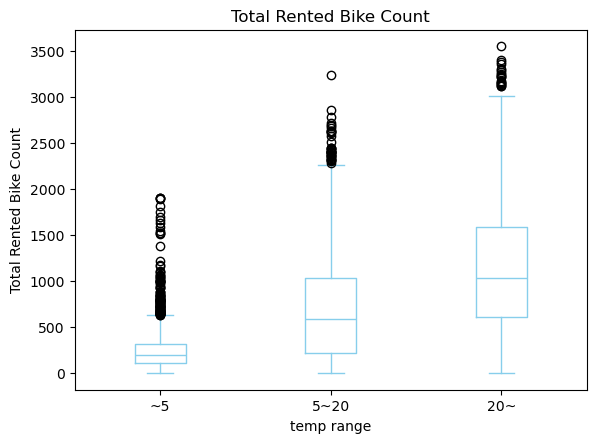

In [16]:
#각 범위별 평균과 범위 살펴보기
plt.figure(figsize=(10, 6))
df.boxplot(column='Rented Bike Count', by='Temp Range', grid=False, color='skyblue')
plt.suptitle('') 
plt.xlabel('temp range')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count')

In [38]:
#초기 데이터프레임은 변경이 적은 게 좋을 거 같다는 판단에 내가 임의로 만든 열은 삭제하고 다음 과정 실행하기
df.drop(['Month','Temp Range'],axis=1,inplace=True)
df.head(6)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes


# Humidity(%)

In [18]:
#결측값 확인
df['Humidity(%)'].isna().sum()
print(sorted(df['Humidity(%)'].unique().tolist()))

[0, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity(%)', ylabel='Count'>

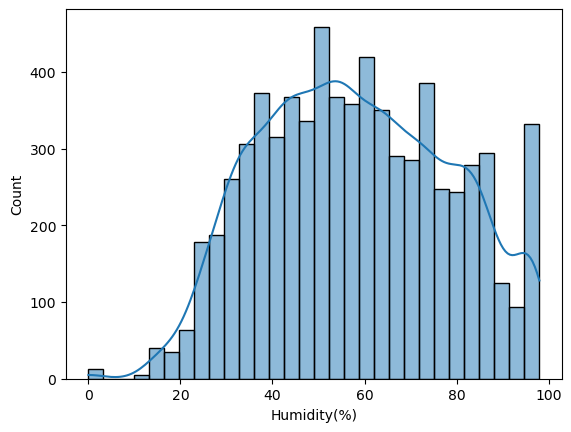

In [19]:
sns.histplot(df['Humidity(%)'], bins=30, kde=True)

In [20]:
# 계절별 평균 습도
humid_avg_sea = df.groupby('Seasons')['Humidity(%)'].mean()
print(round(df['Humidity(%)'].mean(),2),'\n')
print(round(df['Humidity(%)'].median(),2),'\n')
print(humid_avg_sea)
# 기온이 높은 계절일수록 습도도 높다는 것을 알 수 있다.

58.14 

57.0 

Seasons
Autumn    59.030682
Spring    59.146497
Summer    64.746471
Winter    49.573143
Name: Humidity(%), dtype: float64


<Axes: xlabel='Seasons', ylabel='Humidity(%)'>

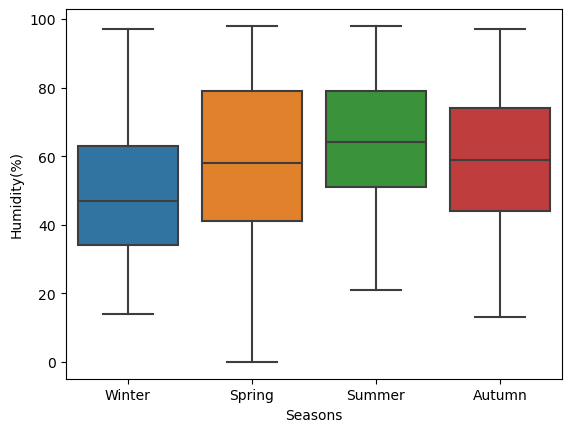

In [21]:
sns.boxplot(x='Seasons',y ='Humidity(%)', data=df)

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Total Rented Bike Count by Humidity (%)')

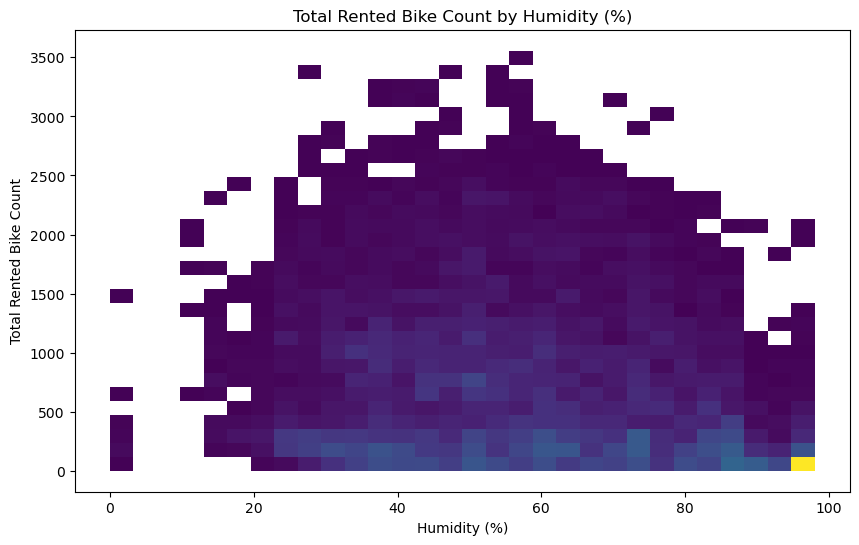

In [25]:
#습도별 자전거 이용량을 확인하려고 함
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Humidity(%)', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Humidity (%)')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count by Humidity (%)')
#특정 습도범위에서 눈에 띄게 자전거 사용량이 높지 않음

# Wind speed (m/s) 

In [261]:
print(df['Wind speed (m/s)'].isna().sum(),'\n')
print(sorted(df['Wind speed (m/s)'].unique().tolist()))

705 

[0.0, 0.5, 0.8, 0.9, 1.0, 1.1, 1.3, 1.7, 1.8, 2.0, 2.2, nan, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 1.2, 1.4, 1.5, 1.6, 1.9, 2.1, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.6, 5.7, 5.8, 6.0, 6.1, 6.9, 7.2, 7.3, 7.4]


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wind speed (m/s)', ylabel='Count'>

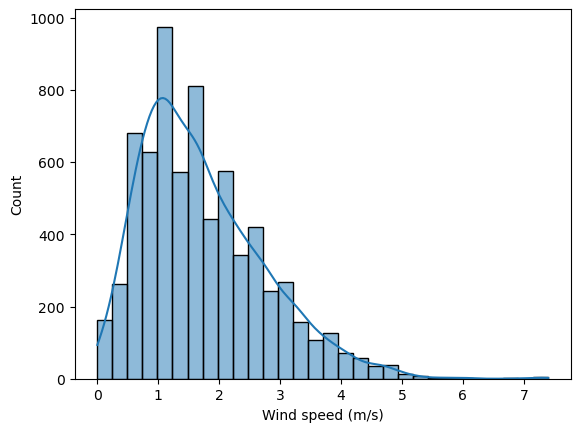

In [280]:
sns.histplot(df['Wind speed (m/s)'], bins=30, kde=True)
# 특정구간에 빈도가 몰려있다.

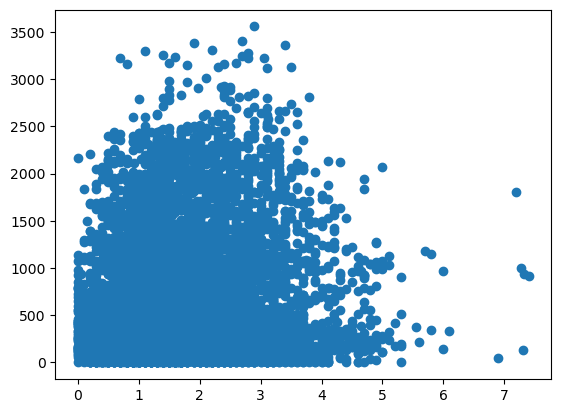

In [283]:
plt.scatter(df['Wind speed (m/s)'],df['Rented Bike Count'])

Seasons
Autumn    1.498110
Spring    1.866197
Summer    1.618292
Winter    1.917624
Name: Wind speed (m/s), dtype: float64


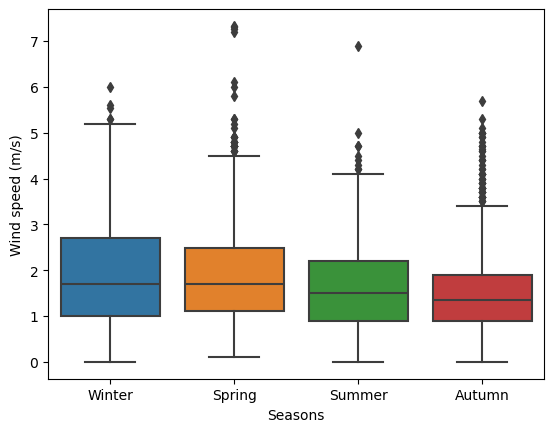

In [273]:
sns.boxplot(x='Seasons',y ='Wind speed (m/s)', data=df)
print(df.groupby('Seasons')['Wind speed (m/s)'].mean())
#계절별 유의미한 차이가 없는 것을 확인할 수 있다.

# Visibility (10m)

In [275]:
print(df['Visibility (10m)'].isna().sum(),'\n')
print(sorted(df['Visibility (10m)'].unique().tolist()))

0 

[27, 34, 38, 53, 54, 63, 66, 72, 73, 77, 79, 80, 87, 88, 89, 90, 91, 94, 95, 96, 100, 102, 103, 105, 110, 113, 116, 117, 118, 122, 124, 125, 129, 130, 135, 137, 140, 141, 143, 145, 147, 148, 152, 153, 155, 156, 157, 158, 159, 160, 163, 164, 166, 167, 168, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 247, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 268, 269, 270, 272, 273, 274, 275, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 319, 320, 321, 322, 323, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Visibility (10m)', ylabel='Count'>

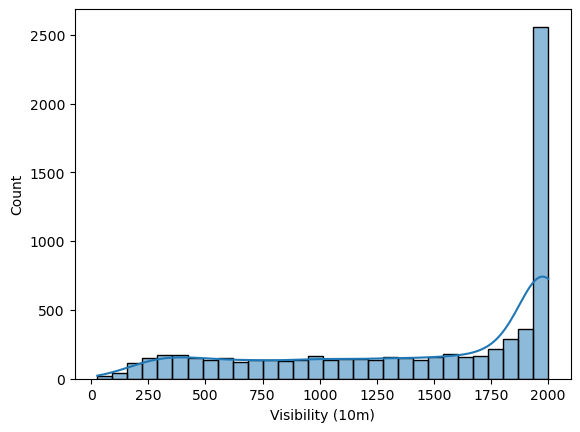

In [281]:
sns.histplot(df['Visibility (10m)'], bins=30, kde=True)
#가시성이 2000에 가까울수록 높은 빈도를 보이고 있음
#또한 빈도가 급격하게 높아지는 특정 구가을 제외하고는 비슷한 빈도를 띄고 있음

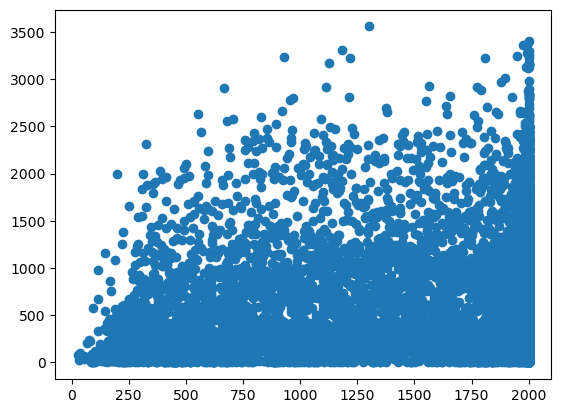

In [284]:
plt.scatter(df['Visibility (10m)'],df['Rented Bike Count'])

Seasons
Autumn    1557.156900
Spring    1235.400257
Summer    1507.235920
Winter    1451.463694
Name: Visibility (10m), dtype: float64


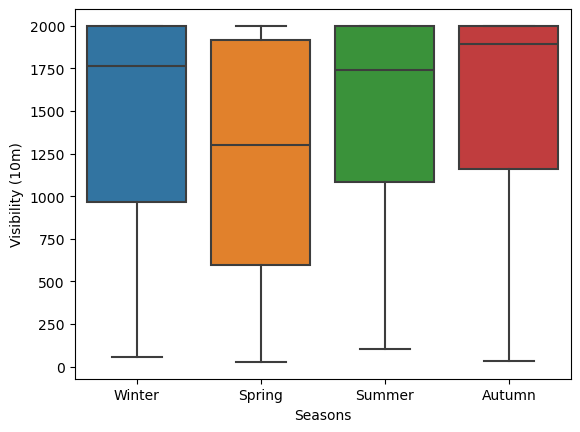

In [276]:
sns.boxplot(x='Seasons',y ='Visibility (10m)', data=df)
print(df.groupby('Seasons')['Visibility (10m)'].mean())
#봄을 제외하고는 3계절의 가시성의 평균의 차이가 적다고 판단함
#따라서 자전거 사용량과 강한 관계를 가지고 있다고 생각하지 않음

# Dew point temperature(°C)

In [286]:
print(df['Dew point temperature(°C)'].isna().sum(),'\n')
print(sorted(df['Dew point temperature(°C)'].unique().tolist()))

0 

[-30.6, -30.5, -29.7, -29.6, -29.5, -29.2, -29.1, -29.0, -28.9, -28.7, -28.3, -28.2, -28.1, -28.0, -27.9, -27.8, -27.7, -27.6, -27.4, -27.3, -27.2, -27.1, -27.0, -26.9, -26.8, -26.7, -26.6, -26.5, -26.3, -26.2, -26.1, -26.0, -25.9, -25.8, -25.6, -25.5, -25.4, -25.3, -25.2, -25.1, -25.0, -24.9, -24.8, -24.6, -24.4, -24.2, -24.1, -24.0, -23.9, -23.8, -23.7, -23.6, -23.5, -23.4, -23.3, -23.2, -23.1, -23.0, -22.9, -22.8, -22.7, -22.6, -22.5, -22.4, -22.3, -22.2, -22.1, -22.0, -21.9, -21.8, -21.7, -21.6, -21.5, -21.4, -21.3, -21.2, -21.1, -21.0, -20.9, -20.8, -20.7, -20.6, -20.5, -20.4, -20.3, -20.2, -20.1, -20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19.0, -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18.0, -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17.0, -16.9, -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16.0, -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1, -15.0, -14.9, -14.8, -14.7, -14.6, -

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Dew point temperature(°C)', ylabel='Count'>

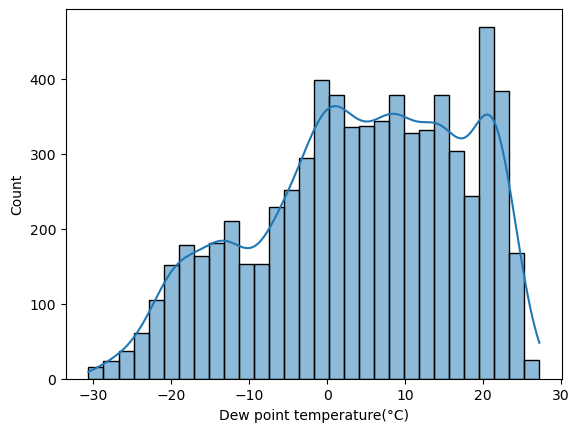

In [287]:
sns.histplot(df['Dew point temperature(°C)'], bins=30, kde=True)
# 분포가 전체적인 값에 꽤나 고르게 퍼져있다. 계절별로 유의미한 차이가 있을 것이라고 추정된다.

Seasons
Autumn     5.439698
Spring     4.217117
Summer    18.776846
Winter   -12.471401
Name: Dew point temperature(°C), dtype: float64


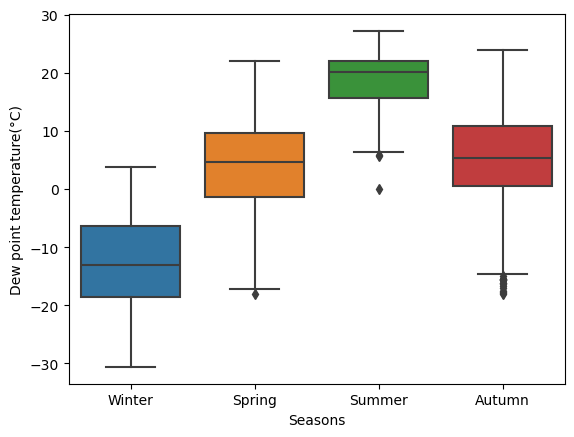

In [288]:
sns.boxplot(x='Seasons',y ='Dew point temperature(°C)', data=df)
print(df.groupby('Seasons')['Dew point temperature(°C)'].mean())
#이슬점 온도는 기온과 관련이 깊음 그래서 계절별로 뚜렷한 차이를 드러내고 있음

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

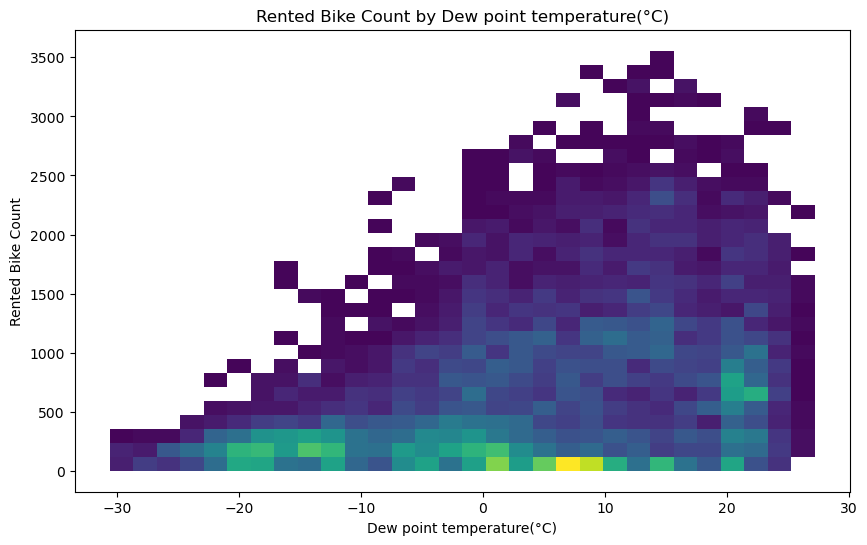

In [73]:
#이슬점 온도와 자전거 사용량에 관계가 있을 거라고 생각해서 시각화 해보고자 함
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Dew point temperature(°C)', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Dew point temperature(°C)')
plt.colorbar(label='Count')
plt.show()
#이슬점의 온도가 여름의 평균 이슬점 온도와 유사한 x의 범위에서 자전거 대여량의 값이 큼

# Solar Radiation (MJ/m2)

In [304]:
print(df['Solar Radiation (MJ/m2)'].isna().sum(),'\n')
print(sorted(df['Solar Radiation (MJ/m2)'].unique().tolist()))

0 

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Count'>

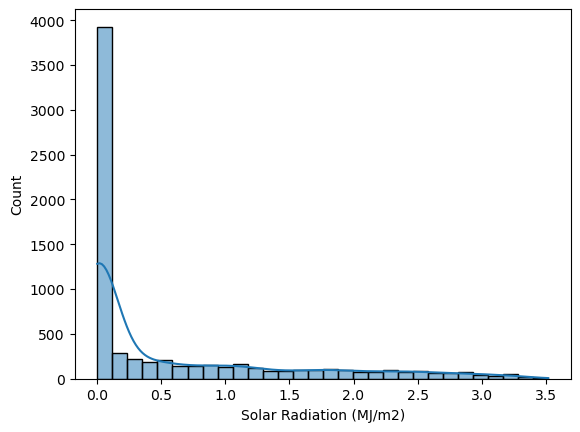

In [47]:
sns.histplot(df['Solar Radiation (MJ/m2)'], bins=30, kde=True)
# 태양 복사에너지는 0에 근접할수록 많은 빈도를 보인다.

Seasons
Autumn    0.534549
Spring    0.691274
Summer    0.784975
Winter    0.301223
Name: Solar Radiation (MJ/m2), dtype: float64


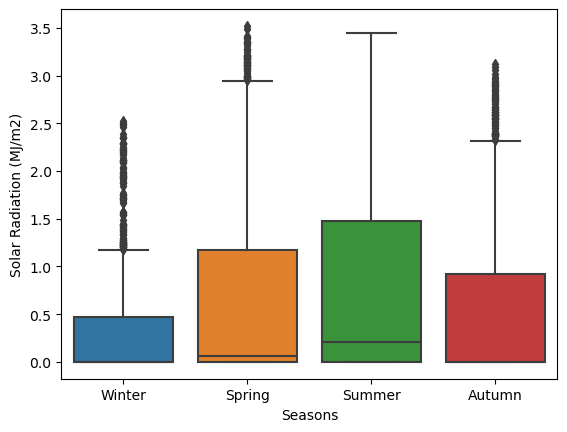

In [305]:
sns.boxplot(x='Seasons',y ='Solar Radiation (MJ/m2)', data=df)
print(df.groupby('Seasons')['Solar Radiation (MJ/m2)'].mean())
# 태양 복사에너지는 여름 > 봄,가을 > 겨울 이 알려진 사실이다.

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

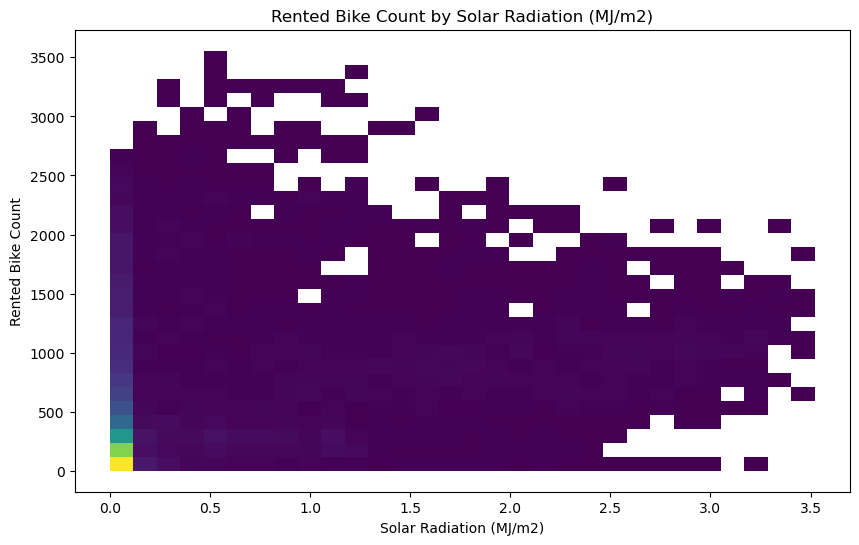

In [306]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Solar Radiation (MJ/m2)', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Solar Radiation (MJ/m2)')
plt.colorbar(label='Count')
plt.show()
# 그래프를 보면 유의미한 정보를 얻을 수 있을 거 같지는 않음

In [39]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Rainfall(mm)

In [310]:
print(df['Rainfall(mm)'].isna().sum(),'\n')
print(sorted(df['Rainfall(mm)'].unique().tolist()))

0 

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2.0, 2.5, 3.0, 3.3, 3.5, 3.7, 4.0, 4.5, 4.9, 5.0, 5.4, 5.5, 6.0, 6.4, 6.5, 7.0, 7.3, 7.5, 8.0, 8.5, 9.0, 9.1, 9.5, 10.0, 10.5, 12.0, 12.5, 13.0, 13.5, 14.5, 16.0, 17.0, 18.0, 18.5, 19.0, 21.5, 29.5, 35.0]


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rainfall(mm)', ylabel='Count'>

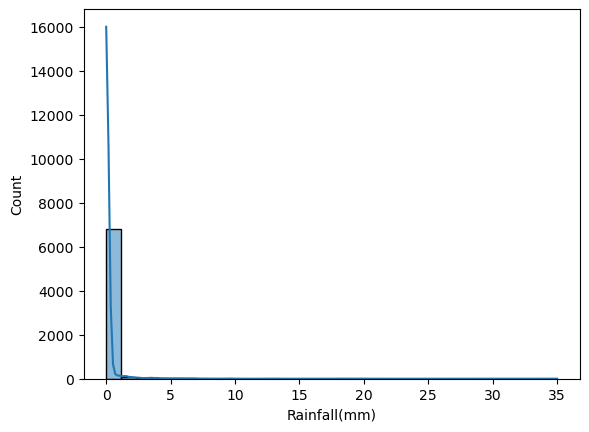

In [49]:
sns.histplot(df['Rainfall(mm)'], bins=30, kde=True)
# 0에 근접할 수록 많은 빈도를 가짐

Seasons
Autumn    0.126193
Spring    0.207122
Summer    0.230604
Winter    0.037086
Name: Rainfall(mm), dtype: float64


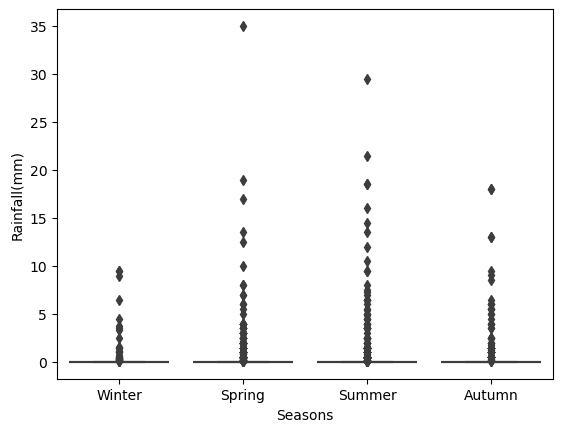

In [41]:
sns.boxplot(x='Seasons',y ='Rainfall(mm)', data=df)
print(df.groupby('Seasons')['Rainfall(mm)'].mean())
# 유독 작은 겨울을 제외하고는 계절별 뚜렷한 차이를 보기가 힘들다.

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

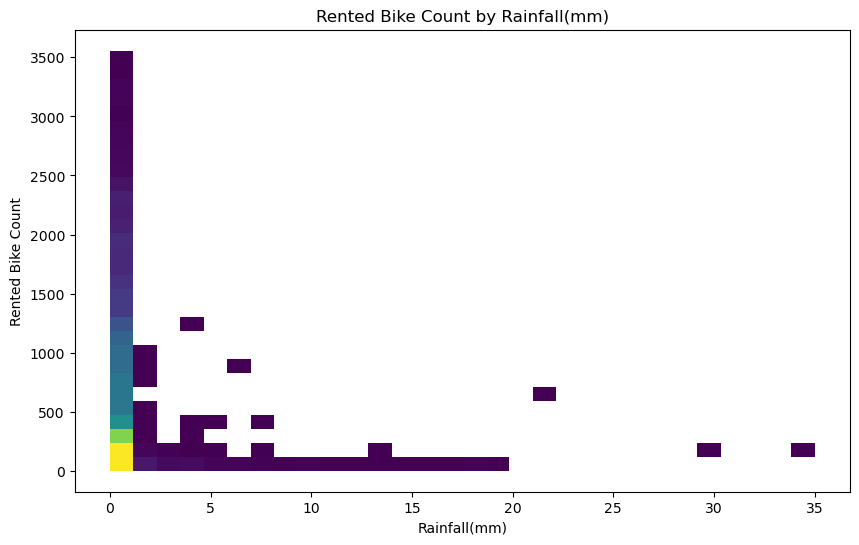

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rainfall(mm)', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Rainfall(mm)')
plt.colorbar(label='Count')
plt.show()
# 그래프를 봤을 때 강수량이 0에 근접한 곳에 대여량이 몰려있는 것으로 보아 계절의 영향보다는 강수량이 낮을 수록 대여량이 많다는 것을 알 수 있음

# Snowfall (cm)	

In [43]:
print(df['Snowfall (cm)'].isna().sum(),'\n')
print(sorted(df['Snowfall (cm)'].unique().tolist()))

0 

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.8, 5.0, 5.1, 7.0, 7.1, 8.8]


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Snowfall (cm)', ylabel='Count'>

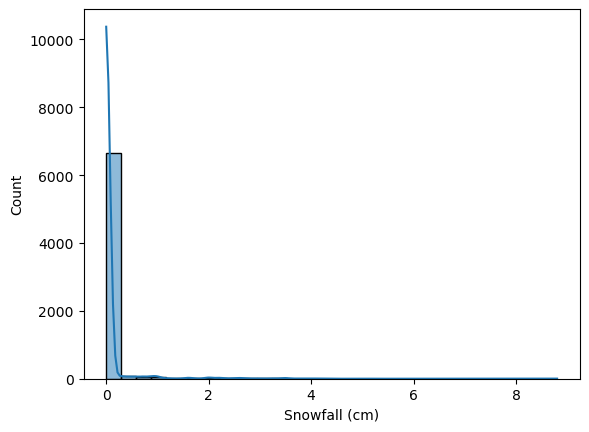

In [52]:
sns.histplot(df['Snowfall (cm)'], bins=30, kde=True)
# 0에 근접할수록 많은 빈도를 가짐

Seasons
Autumn    0.057102
Spring    0.000000
Summer    0.000000
Winter    0.244114
Name: Snowfall (cm), dtype: float64


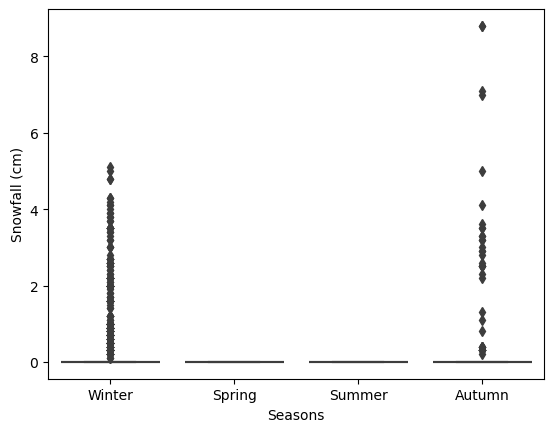

In [44]:
sns.boxplot(x='Seasons',y ='Snowfall (cm)', data=df)
print(df.groupby('Seasons')['Snowfall (cm)'].mean())
# 여름과 봄은 눈이 오지 않고 가을도 굉장히 낮은 강설량을 평균으로 가지고 있다. 겨울에만 강설량이 1이상이다.

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

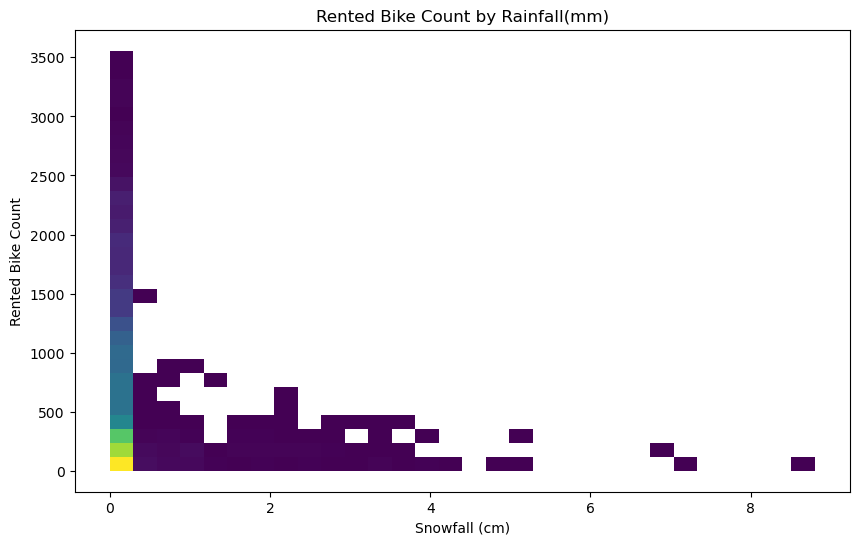

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Snowfall (cm)', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Rainfall(mm)')
plt.colorbar(label='Count')
plt.show()
# 강우량과 유사한 패턴을 보인다. 0에 근접할수록 높은 대여량을 보여주고 있다. 즉, 해당 그래프를 보고는 여름과 봄에 대여량이 많을 것이라고 추정할 수 있다.

# Seasons

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

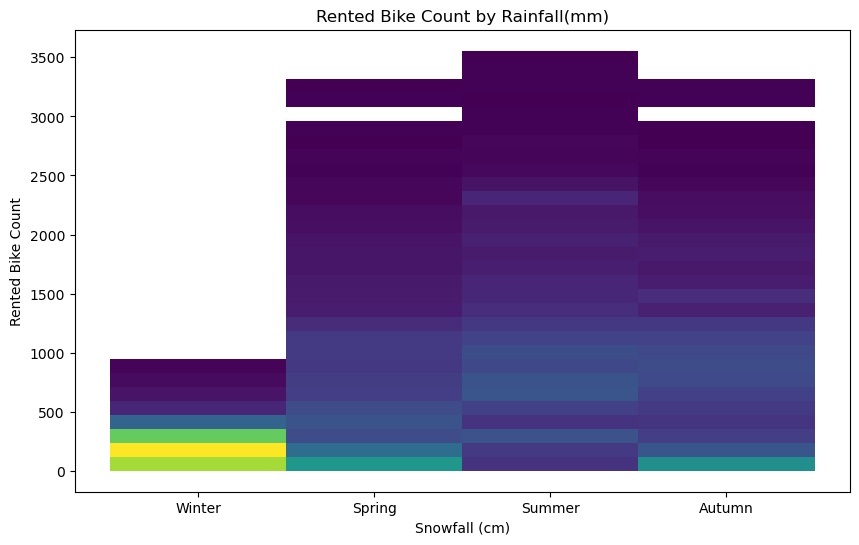

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Seasons', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Rainfall(mm)')
plt.colorbar(label='Count')
plt.show()


Seasons
Autumn     833.067614
Spring     724.381587
Summer    1046.328628
Winter     226.056000
Name: Rented Bike Count, dtype: float64


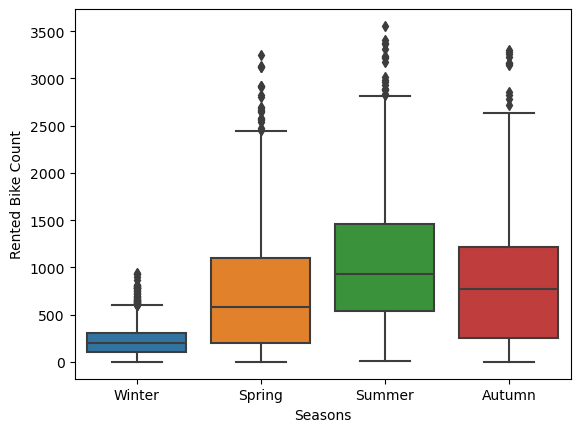

In [58]:
sns.boxplot(x='Seasons' , y='Rented Bike Count',data=df)
print(df.groupby('Seasons')['Rented Bike Count'].mean())
# 여름에 유독 높은 대여량과 겨울에 유독 낮은 대여량을 볼 수 있음

# Holiday

In [69]:
df['Holiday'].unique().tolist()

['No Holiday', 'Holiday']

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

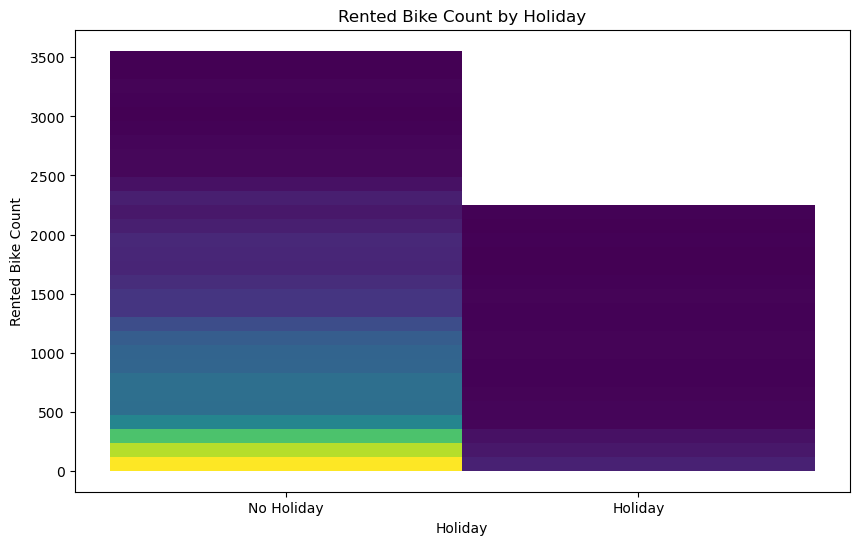

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Holiday', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Holiday')
plt.colorbar(label='Count')
plt.show()

# no holiday에 더 높은 자전거 대여량을 보여주고 있다.

In [64]:
print(df['Rented Bike Count'].groupby(df['Holiday']).mean())

# 자전거 대여량의 평균이 no holiday가 더 높다.

Holiday
Holiday       502.428571
No Holiday    718.753256
Name: Rented Bike Count, dtype: float64


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

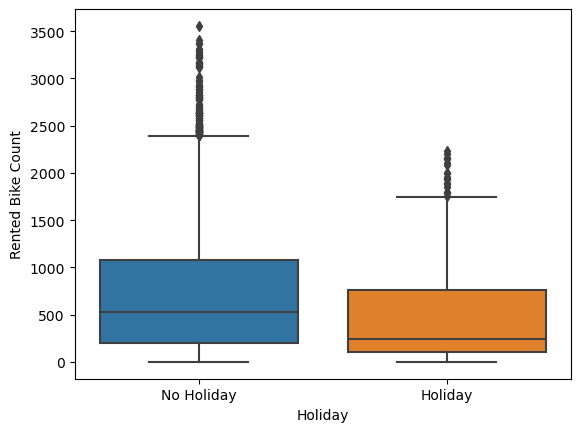

In [65]:
sns.boxplot(x='Holiday' , y='Rented Bike Count',data=df)

# Functioning Day

In [71]:
df['Functioning Day'].unique().tolist()

['Yes', 'No']

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

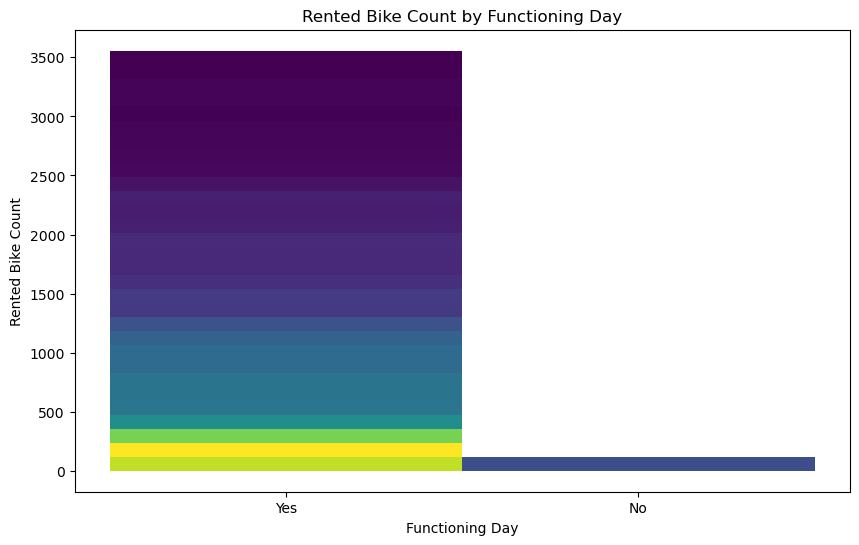

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Functioning Day', y='Rented Bike Count', bins=30, cmap='viridis') #색이 진할수록 해당값의 빈도가 많음
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Functioning Day')
plt.colorbar(label='Count')
plt.show()

Functioning Day
No       0.00000
Yes    733.29179
Name: Rented Bike Count, dtype: float64


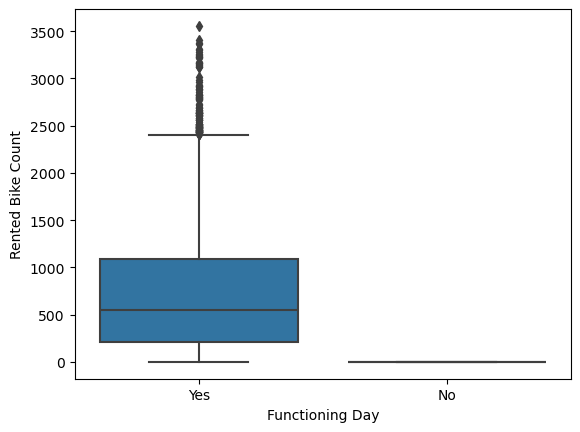

In [72]:
sns.boxplot(x='Functioning Day' , y='Rented Bike Count',data=df)
print(df['Rented Bike Count'].groupby(df['Functioning Day']).mean())
# 값이 no 인 날은 아예 대여량이 없다.

가설 1 : 겨울 -> 여름 -> 봄,가을 순으로 자전거 대여량이 많을 것이다.  
가설 2 : 출퇴근 시간에 자전거 대여량이 많을 것이다.  
# 가설1   
실제로 데이터를 살펴보니 여름의 자전거 대여량이 봄,가을보다 많았다. 겨울의 자전거 대여량은 예상대로 가장 낮았다.  
# 가설2  
데이터를 살펴보니 출퇴근 시간에 자전거 대여량이 많을 것이라는 가설은 맞다고 볼 수 있다. 그래서 no holiday일 때 자전거 대여량이 높은 것을 볼 수 있다.